# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import re 
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score

import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [4]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv('fakenews.csv')
data.head()

# 0 : 'real', 1 : 'fake'

,text,label
0,Get the latest from TODAY Sign up for our news...,1
1,2d Conan On The Funeral Trump Will Be Invited...,1
2,It’s safe to say that Instagram Stories has fa...,0
3,Much like a certain Amazon goddess with a lass...,0
4,At a time when the perfect outfit is just one ...,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4986 entries, 0 to 4985
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          4986 non-null   object
 1   label         4986 non-null   int64 
 2   cleaned_text  4986 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.0+ KB


# Clean Data

In [5]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word in string.ascii_letters or word in string.whitespace])
    tokens = re.split('\W+', text)
    text = " ".join(ps.stem(word) for word in tokens if word not in stopwords)
    return text

In [7]:
data['cleaned_text'] = data['text'].apply(lambda x: clean_text(x))
data.head()

,text,label,cleaned_text
0,Get the latest from TODAY Sign up for our news...,1,get latest today sign newslett one ever truli ...
1,2d Conan On The Funeral Trump Will Be Invited...,1,conan funer trump invit conan tb
2,It’s safe to say that Instagram Stories has fa...,0,safe say instagram stori far surpass competito...
3,Much like a certain Amazon goddess with a lass...,0,much like certain amazon goddess lasso height ...
4,At a time when the perfect outfit is just one ...,0,time perfect outfit one click away high demand...


# TF-IDF

In [9]:
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(data['cleaned_text'])

print(X_tfidf.shape)

(4986, 60600)


In [10]:
print(tfidf_vect.get_feature_names_out()[-100:-1])

['ziplin' 'zipling' 'ziploc' 'ziplock' 'zipper' 'zippi' 'zippo' 'zipup'
 'zirconia' 'zirconium' 'ziskin' 'zissou' 'zit' 'zito' 'zitto' 'ziva'
 'zivcov' 'ziyadatgetti' 'zizzo' 'zlotnick' 'zlotnickmarvel' 'zo' 'zodiac'
 'zoe' 'zoeasi' 'zoern' 'zoesaldana' 'zoey' 'zoie' 'zoila' 'zola' 'zolad'
 'zolciack' 'zolciak' 'zolciakbierman' 'zolciakbiermann' 'zoll' 'zoller'
 'zombi' 'zombieapocalyps' 'zombiedragon' 'zombieinfest' 'zombieland'
 'zona' 'zone' 'zoo' 'zooey' 'zookeep' 'zooland' 'zoolog' 'zoom'
 'zoomedin' 'zoomett' 'zoot' 'zootopia' 'zora' 'zorro' 'zosia' 'zoya'
 'zozo' 'zpz' 'zrtp' 'zryu' 'zs' 'zsay' 'zte' 'ztv' 'zuber' 'zucker'
 'zuckerberg' 'zuckerbrot' 'zuckerkorn' 'zue' 'zuelika' 'zuhair' 'zuiker'
 'zuill' 'zuker' 'zuleyka' 'zuma' 'zune' 'zuniga' 'zunino' 'zuri' 'zuria'
 'zurich' 'zutter' 'zvyagintsev' 'zweig' 'zwick' 'zyahna' 'zygon' 'zylka'
 'zynga' 'zyru' 'zyrusfrom' 'zyruss' 'zyskowski' 'zz']


In [11]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names_out()
X_tfidf_df

,aa,aaa,aaaaand,aaand,aabb,aac,aacta,aad,aaden,aakar,...,zyahna,zygon,zylka,zynga,zyru,zyrusfrom,zyruss,zyskowski,zz,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Random Forest

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['label'], test_size=0.2)

In [13]:
tfidf_vect = TfidfVectorizer(dtype=np.float32)
tfidf_vect_fit = tfidf_vect.fit(X_train)

In [14]:
tfidf_train = tfidf_vect_fit.transform(X_train)
tfidf_test = tfidf_vect_fit.transform(X_test)

In [15]:
X_train_vect = pd.DataFrame(tfidf_train.toarray())
X_test_vect = pd.DataFrame(tfidf_test.toarray())

In [16]:
X_train_vect.head()

,0,1,2,3,4,5,6,7,8,9,...,53126,53127,53128,53129,53130,53131,53132,53133,53134,53135
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Grid Search

In [28]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators = n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train_vect, y_train)
    y_pred = rf_model.predict(X_test_vect)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label=1, average='binary')
    print('Est: {} / Depth: {} ----- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall,3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

In [29]:
for n_est in [10, 50, 100, 150]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ----- Precision: 0.808 / Recall: 0.348 / Accuracy: 0.706
Est: 10 / Depth: 20 ----- Precision: 0.698 / Recall: 0.393 / Accuracy: 0.689
Est: 10 / Depth: 30 ----- Precision: 0.727 / Recall: 0.494 / Accuracy: 0.723
Est: 10 / Depth: None ----- Precision: 0.735 / Recall: 0.501 / Accuracy: 0.728
Est: 50 / Depth: 10 ----- Precision: 0.892 / Recall: 0.248 / Accuracy: 0.687
Est: 50 / Depth: 20 ----- Precision: 0.872 / Recall: 0.376 / Accuracy: 0.728
Est: 50 / Depth: 30 ----- Precision: 0.848 / Recall: 0.491 / Accuracy: 0.762
Est: 50 / Depth: None ----- Precision: 0.803 / Recall: 0.511 / Accuracy: 0.755
Est: 100 / Depth: 10 ----- Precision: 0.897 / Recall: 0.261 / Accuracy: 0.692
Est: 100 / Depth: 20 ----- Precision: 0.891 / Recall: 0.409 / Accuracy: 0.743
Est: 100 / Depth: 30 ----- Precision: 0.84 / Recall: 0.434 / Accuracy: 0.74
Est: 100 / Depth: None ----- Precision: 0.847 / Recall: 0.569 / Accuracy: 0.787
Est: 150 / Depth: 10 ----- Precision: 0.941 / Recall: 0.241 / Accura

## Random Forest Fakes Detection

In [30]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs=-1)

rf_model = rf.fit(X_train_vect, y_train)
y_pred_rf = rf_model.predict(X_test_vect)

precision, recall, fscore, train_support = score(y_test, y_pred_rf, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
        round(precision, 3), round(recall, 3), round((y_pred_rf==y_test).sum() / len(y_pred_rf), 3 )))

Precision: 0.833 / Recall: 0.551 / Accuracy: 0.777


In [35]:
rf_df = pd.DataFrame([X_test, y_test]).transpose()
rf_df['pred'] = y_pred_rf

rf_df['label'] = rf_df['label'].apply(lambda x: 'Real' if x==0 else 'Fake')
rf_df['pred'] = rf_df['pred'].apply(lambda x: 'Real' if x==0 else 'Fake')

rf_df[rf_df['pred'] != rf_df['label']]

,cleaned_text,label,pred
524,kind thing cant make tyga blac chyna lamar odo...,Real,Fake
3943,accord south african newspap time ran stori pa...,Fake,Real
1095,fcc decid take action stephen colbert may late...,Fake,Real
2736,golden globe award host seth meyer kick hollyw...,Fake,Real
3117,despit rumor possibl breakup jami foxx kati ho...,Real,Fake
...,...,...,...
4603,spoiler stori contain full spoiler season two ...,Fake,Real
3338,handmaid tale big littl lie atlanta veep among...,Fake,Real
4513,avril lavign aliv th anniversari pop star hit ...,Fake,Real
2011,duchess cambridg duchess cambridg born catheri...,Fake,Real


<Axes: xlabel='label', ylabel='count'>

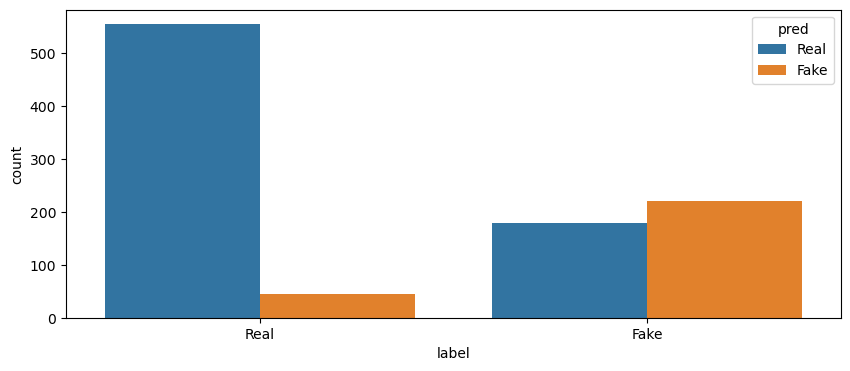

In [36]:
plt.figure(figsize=(10,4))
sns.countplot(data=rf_df, x='label', hue='pred')